In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colnames=['Value','Text'] 
df = pd.read_csv('/Users/karthik_swasaka/Downloads/my_file.csv',sep = '\t', names=colnames, header=None)

In [3]:
df[['index', 'Value']] = df['Value'].str.split(',', expand=True)
df.head()

Value                                               Text index
0    "4  Catheterization laboratory events and hospital...      
1    "5  Renal abscess in children. Three cases of rena...     0
2    "2  Hyperplastic polyps seen at sigmoidoscopy are ...     1
3    "5  Subclavian artery to innominate vein fistula a...     2
4    "4  Effect of local inhibition of gamma-aminobutyr...     3

In [4]:
df.drop("index", axis='columns',inplace = True)
df['Value'] = df['Value'].str.replace('"', '').astype(int)


In [7]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/karthik_swasaka/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/karthik_swasaka/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karthik_swasaka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/karthik_swasaka/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df['Tokenized_Text'] = df['Text'].apply(nltk.word_tokenize)
df['lowercase_Text'] = df['Tokenized_Text'].apply(lambda x: [word.lower() for word in x])
df['Puntuation_rem_Text'] = df['lowercase_Text'].apply(lambda x: [word.translate(str.maketrans('', '', string.punctuation)) for word in x])
df['Stop_words_rem_Text'] = df['Puntuation_rem_Text'].apply(lambda x: [word for word in x if word not in stop_words])
df['Lemmatized_Text'] = df['Stop_words_rem_Text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['Processed_Text'] = df['Lemmatized_Text'].apply(lambda x: ' '.join(x))
new_df = df
new_df = new_df[['Value','Processed_Text']]
new_df.head()

Value                                     Processed_Text
0      4  catheterization laboratory event hospital outc...
1      5  renal abscess child  three case renal abscess ...
2      2  hyperplastic polyp seen sigmoidoscopy marker a...
3      5  subclavian artery innominate vein fistula inse...
4      4  effect local inhibition gammaaminobutyric acid...

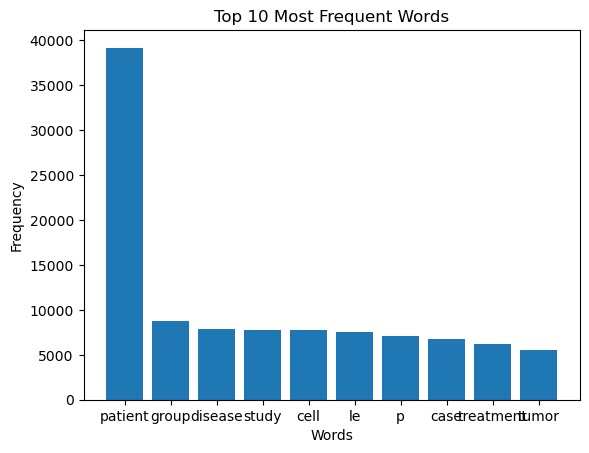

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter


# Tokenize the text and count the frequency of each word
all_words = []
for text in new_df['Processed_Text']:
    words = word_tokenize(text)
    all_words.extend(words)
word_counts = Counter(all_words)

# Get the top 10 most frequent words
top_words = word_counts.most_common(10)

# Extract the words and their counts
words = [word[0] for word in top_words]
counts = [word[1] for word in top_words]

# Create a bar chart of the top 10 most frequent words
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.show()

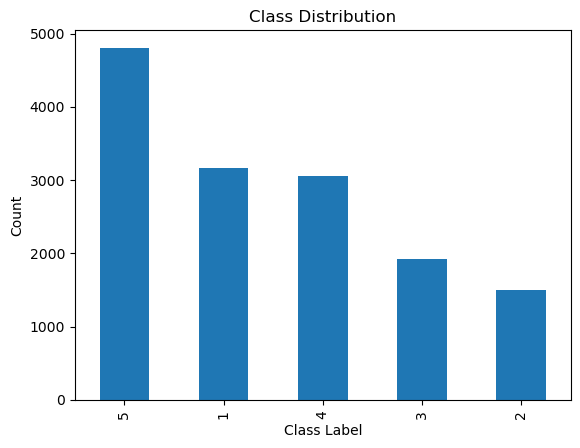

In [17]:
# Count the number of occurrences of each class label
class_counts = new_df['Value'].value_counts()

# Create a bar chart of the class distribution
class_counts.plot(kind='bar')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [20]:

# Calculate the length of each text string
new_df['Text Length'] = new_df['Processed_Text'].apply(len)

/var/folders/28/mr1d2vnd4hbc41d0kmz4xvb40000gn/T/ipykernel_28794/840643069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Text Length'] = new_df['Processed_Text'].apply(len)


In [21]:
new_df.head()

Value                                     Processed_Text  Text Length
0      4  catheterization laboratory event hospital outc...         1441
1      5  renal abscess child  three case renal abscess ...          736
2      2  hyperplastic polyp seen sigmoidoscopy marker a...          796
3      5  subclavian artery innominate vein fistula inse...          652
4      4  effect local inhibition gammaaminobutyric acid...         1634

Value
1     929.469491
2     960.473896
3     871.805714
4    1076.965913
5     949.443704
Name: Text Length, dtype: float64
Value
1    389.226564
2    370.626381
3    365.828378
4    418.926882
5    394.028481
Name: Text Length, dtype: float64


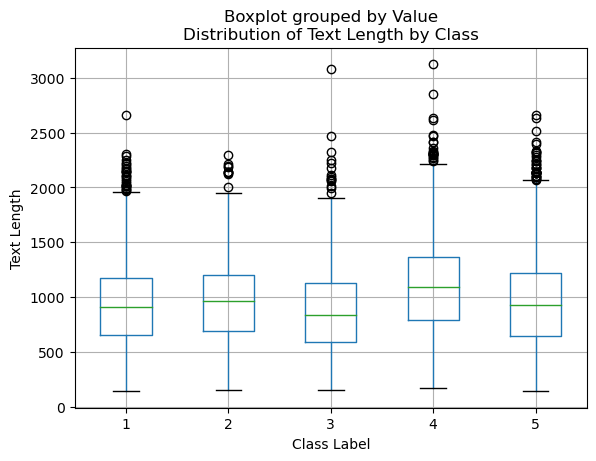

In [22]:
# Group the text lengths by class label and calculate the mean and standard deviation
grouped = new_df.groupby('Value')['Text Length']
mean = grouped.mean()
std = grouped.std()

# Print the mean and standard deviation for each class
print(mean)
print(std)

# Create a box plot of the text length distribution for each class
new_df.boxplot(column='Text Length', by='Value')
plt.xlabel('Class Label')
plt.ylabel('Text Length')
plt.title('Distribution of Text Length by Class')
plt.show()

In [27]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 2.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [89 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.1-arm64-cpython-310
      creating build/lib.macosx-11.1-arm64-cpython-310/wordcloud
      copying wordcloud/wordcloud_cli.py -> build/lib.macosx-11.1-arm64-cpython-310/wordcloud
      copying wordcloud/_version.py -> build/lib.macosx-11.1-arm64-cpython-310/wordcloud
      copying wordcloud/__init__.py -> build/lib.macosx-11.1-arm64-cpython-310/wordcloud
      copying wordcloud/tokenization.py -> build/lib.macosx-11.1-arm64-cpython-310/wordcloud
      copying wordcloud/wordcloud.py -> build/lib.macosx-11.1-arm64-cpython-310/wordcloud
      copying wordcloud/color_from_image.py -> build/lib.maco

Failed to build wordcloud
  Running setup.py install for wordcloud ... done
  DEPRECATION: wordcloud was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. pip 23.1 will enforce this behaviour change. A possible replacement is to fix the wheel build issue reported above. Discussion can be found at https://github.com/pypa/pip/issues/8368
Note: you may need to restart the kernel to use updated packages.


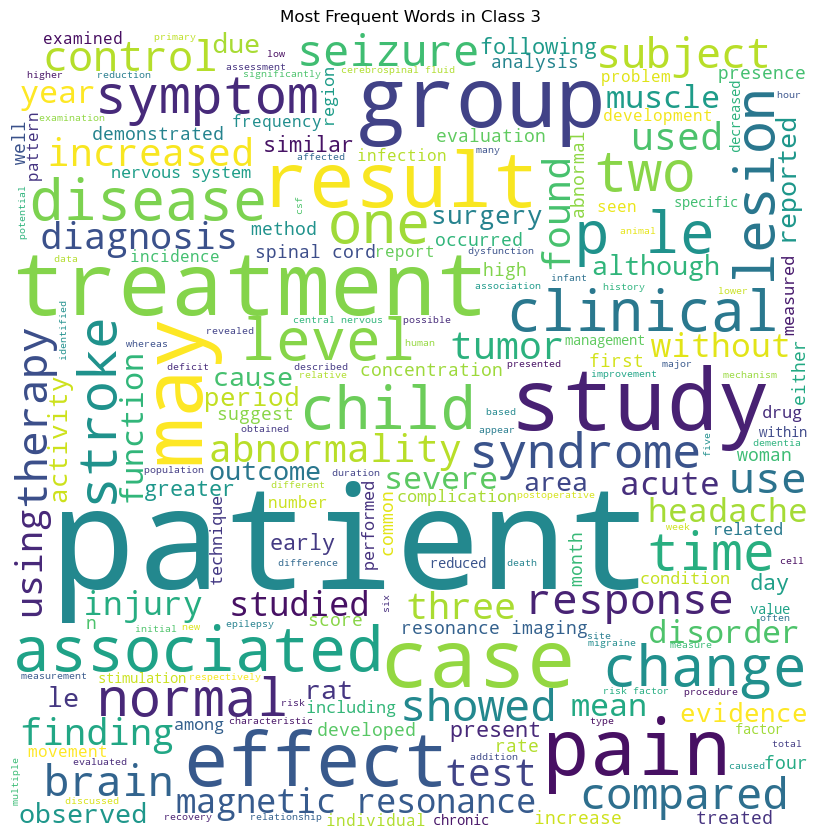

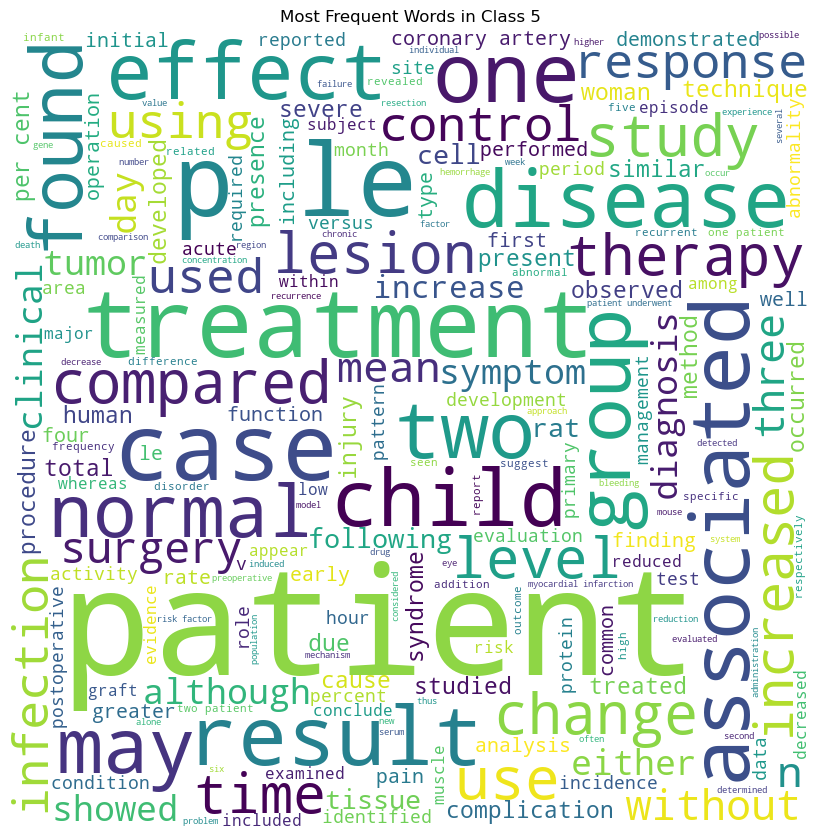

In [29]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Group the text by class label
grouped = new_df.groupby('Value')['Processed_Text']

# Create a word cloud for each class
for label, text in grouped:
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title(f'Most Frequent Words in Class {label}')
    plt.show()


In [30]:
import pandas as pd
import nltk
from nltk import ngrams
from collections import Counter


# Define the value of n for n-grams
n = 2

# Create a list of n-grams for each text string
ngram_lists = new_df['Processed_Text'].apply(lambda x: list(ngrams(nltk.word_tokenize(x.lower()), n)))

# Flatten the list of n-grams and count the frequency of each n-gram
ngrams_flat = [ngram for ngram_list in ngram_lists for ngram in ngram_list]
ngram_freq = Counter(ngrams_flat)

# Print the most frequent n-grams and their frequency
print(ngram_freq.most_common(10))


[(('p', 'le'), 4914), (('coronary', 'artery'), 1527), (('blood', 'pressure'), 1464), (('le', '005'), 1442), (('left', 'ventricular'), 1153), (('per', 'cent'), 1069), (('le', '001'), 1007), (('myocardial', 'infarction'), 1006), (('le', '0001'), 1000), (('mm', 'hg'), 912)]


In [32]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 3.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
from textblob import TextBlob


# Define a function to calculate sentiment polarity for each text string
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Add a new column to the DataFrame with the sentiment polarity for each text string
new_df['Sentiment'] = new_df['Processed_Text'].apply(calculate_sentiment)

# Group the sentiment polarity by class label and calculate the mean and standard deviation
grouped = new_df.groupby('Value')['Sentiment']
sentiment_mean = grouped.mean()
sentiment_std = grouped.std()

# Print the mean and standard deviation for each class
for label, mean, std in zip(sentiment_mean.index, sentiment_mean, sentiment_std):
    print(f"Class {label}: Mean sentiment polarity = {mean:.2f}, Std. deviation = {std:.2f}")


Class 1: Mean sentiment polarity = 0.09, Std. deviation = 0.11
Class 2: Mean sentiment polarity = 0.08, Std. deviation = 0.11
Class 3: Mean sentiment polarity = 0.06, Std. deviation = 0.12
Class 4: Mean sentiment polarity = 0.08, Std. deviation = 0.11
Class 5: Mean sentiment polarity = 0.08, Std. deviation = 0.12


/var/folders/28/mr1d2vnd4hbc41d0kmz4xvb40000gn/T/ipykernel_28794/3154468399.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sentiment'] = new_df['Processed_Text'].apply(calculate_sentiment)
